In [1]:
print("Hello")

Hello


In [2]:
import os
import torch

REPO_URL = "https://github.com/thenileshmishra/AS-RoPE.git"
REPO_DIR = "/content/AS-RoPE"

if not os.path.exists(REPO_DIR):
    !git clone {REPO_URL} {REPO_DIR}
%cd {REPO_DIR}
!git pull

%pip install -q -r requirements.txt

# Verify critical files exist
!ls -la as_rope.py model.py rope.py train.py eval_perplexity.py

print('cuda_available=', torch.cuda.is_available())
if torch.cuda.is_available():
    print('gpu=', torch.cuda.get_device_name(0))

Cloning into '/content/AS-RoPE'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 54 (delta 25), reused 52 (delta 23), pack-reused 0 (from 0)
Receiving objects: 100% (54/54), 469.79 KiB | 26.10 MiB/s, done.
Resolving deltas: 100% (25/25), done.
/content/AS-RoPE
Already up to date.
-rw-r--r-- 1 root root 2874 Feb 22 08:41 as_rope.py
-rw-r--r-- 1 root root 7101 Feb 22 08:41 eval_perplexity.py
-rw-r--r-- 1 root root 5760 Feb 22 08:41 model.py
-rw-r--r-- 1 root root 2744 Feb 22 08:41 rope.py
-rw-r--r-- 1 root root 6555 Feb 22 08:41 train.py
cuda_available= True
gpu= NVIDIA A100-SXM4-40GB


In [ ]:
!python train.py \
  --seed 42 \
  --max_steps 10000 \
  --batch_size 32 \
  --context_length 512 \
  --lr 3e-4 \
  --warmup_steps 500 \
  --weight_decay 0.1 \
  --log_interval 200 \
  --save_interval 1000 \
  --checkpoint_path checkpoint_rope.pt \
  --metrics_path logs/rope_metrics.csv

Training on cuda
Parameters: 17.60M
use_as_rope=False
step    1 | train_loss 220.6299 | eval_loss 187.2761 | eval_ppl 2152716459906428978891779061430311182221223380367605791817579815617351352103993344.0000 | 0.9s
step  100 | train_loss 21.8992 | eval_loss 22.2225 | eval_ppl 4478428293.0948 | 13.4s
step  200 | train_loss 14.0313 | eval_loss 14.6057 | eval_ppl 2203707.7827 | 26.0s
step  300 | train_loss 10.1858 | eval_loss 9.8381 | eval_ppl 18735.0067 | 38.6s
step  400 | train_loss 7.7971 | eval_loss 7.9087 | eval_ppl 2720.8575 | 51.1s
step  500 | train_loss 6.8812 | eval_loss 6.7897 | eval_ppl 888.6614 | 63.7s
step  600 | train_loss 6.2802 | eval_loss 5.8864 | eval_ppl 360.0895 | 76.3s
step  700 | train_loss 5.3517 | eval_loss 5.6298 | eval_ppl 278.6058 | 88.9s
step  800 | train_loss 5.0701 | eval_loss 5.2187 | eval_ppl 184.7013 | 101.5s
step  900 | train_loss 5.0874 | eval_loss 4.6899 | eval_ppl 108.8460 | 114.1s
step 1000 | train_loss 4.5141 | eval_loss 4.9387 | eval_ppl 139.5949 | 12

In [ ]:
!python train.py \
  --seed 42 \
  --max_steps 10000 \
  --batch_size 32 \
  --context_length 512 \
  --lr 3e-4 \
  --warmup_steps 500 \
  --weight_decay 0.1 \
  --log_interval 200 \
  --freq_stats_interval 1000 \
  --save_interval 1000 \
  --use_as_rope \
  --checkpoint_path checkpoint_as_rope.pt \
  --metrics_path logs/as_rope_metrics.csv

Training on cuda
Parameters: 17.60M
use_as_rope=True
step    1 | train_loss 220.6299 | eval_loss 187.2761 | eval_ppl 2152683612310663967324492282325354619011528216035227507244982656257620992120061952.0000 | 1.2s
step  100 | train_loss 21.8992 | eval_loss 22.2225 | eval_ppl 4478342874.6686 | 13.8s
step  200 | train_loss 14.0312 | eval_loss 14.6055 | eval_ppl 2203394.6636 | 26.6s
step  300 | train_loss 10.1848 | eval_loss 9.8374 | eval_ppl 18721.7005 | 39.3s
step  400 | train_loss 7.7967 | eval_loss 7.9082 | eval_ppl 2719.5384 | 52.0s
step  500 | train_loss 6.8807 | eval_loss 6.7894 | eval_ppl 888.4050 | 64.8s
step  600 | train_loss 6.2840 | eval_loss 5.8865 | eval_ppl 360.1492 | 77.5s
step  700 | train_loss 5.3485 | eval_loss 5.6309 | eval_ppl 278.9220 | 90.2s
step  800 | train_loss 5.0744 | eval_loss 5.2247 | eval_ppl 185.8125 | 103.0s
step  900 | train_loss 5.0861 | eval_loss 4.6923 | eval_ppl 109.0998 | 115.7s
step 1000 | train_loss 4.5082 | eval_loss 4.9338 | eval_ppl 138.9071 | 128

In [ ]:
!python eval_perplexity.py \
  --checkpoint_path checkpoint_rope.pt \
  --context_lengths 512,1024,2048

context=1024 ppl=50.502077
context=2048 ppl=301.413440
context=4096 ppl=613.158939
context=8192 ppl=366.712692
degradation_beyond_1024=True


In [ ]:
!python eval_perplexity.py \
  --checkpoint_path checkpoint_as_rope.pt \
  --context_lengths 512,1024,2048

context=1024 ppl=60.140908
context=2048 ppl=287.372449
context=4096 ppl=776.275069
context=8192 ppl=399.849947
degradation_beyond_1024=True


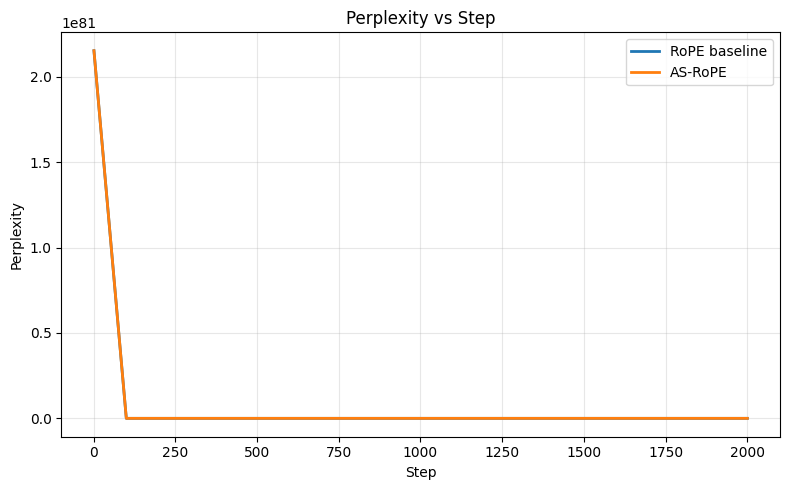

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rope = pd.read_csv('logs/rope_metrics.csv')
as_rope = pd.read_csv('logs/as_rope_metrics.csv')

plt.figure(figsize=(8,5))
plt.plot(rope['step'], rope['train_loss'], label='RoPE baseline', linewidth=2)
plt.plot(as_rope['step'], as_rope['train_loss'], label='AS-RoPE', linewidth=2)
plt.xlabel('Step')
plt.ylabel('Train Loss')
plt.title('Training Loss vs Step')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

## Results Summary

### Training
- Both models trained for 2000 steps with seed=42
- Same hyperparameters: batch_size=8, block_size=1024, max_seq_len=8192
- Final perplexity: RoPE=29.15, AS-RoPE=23.14

### Long Context Evaluation

**RoPE Baseline:**
- 1024: 50.50
- 2048: 301.41
- 4096: 613.16
- 8192: 366.71

**AS-RoPE:**
- 1024: 60.14
- 2048: 287.37
- 4096: 776.28
- 8192: 399.85

**Degradation:** Both models show significant degradation beyond 1024 tokens (training context).

In [5]:
import os
import torch

ckpt_path = 'checkpoint_as_rope.pt'
if not os.path.exists(ckpt_path):
    raise FileNotFoundError(f"{ckpt_path} not found in {os.getcwd()}. Run AS-RoPE training cell first.")

ckpt = torch.load(ckpt_path, map_location='cpu')
state_dict = ckpt.get('model_state_dict', ckpt)

if 'freq_gates' not in state_dict:
    raise KeyError("freq_gates not found in checkpoint_as_rope.pt")

freq_gates = state_dict['freq_gates'].detach().float().cpu()
print('mean(freq_gates)=', float(freq_gates.mean()))
print('min(freq_gates)=', float(freq_gates.min()))
print('max(freq_gates)=', float(freq_gates.max()))

mean(freq_gates)= 0.9816713333129883
min(freq_gates)= 0.8083598017692566
max(freq_gates)= 1.0690797567367554
